## Clasificación y Optimización de Hiperparámetros (Core) de Elida Peña

**Objetivo:** Implementar un pipeline completo de machine learning para un problema de clasificación utilizando técnicas de preprocesamiento, modelado, y optimización de hiperparámetros. Enfocar especialmente en la limpieza de datos y la optimización utilizando GridSearchCV y RandomizedSearchCV.

**Dataset:** Medical Cost Personal Dataset

**Instrucciones:**

**1.Carga y Exploración Inicial de Datos:**

* Cargar el dataset desde Kaggle.

* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.

* Identificar y documentar los valores faltantes y outliers en el dataset.

**2.Preprocesamiento de Datos:**

* Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).

* Codificar variables categóricas utilizando One-Hot Encoding.

* Escalar características numéricas utilizando StandardScaler.

**3.Implementación de Modelos de Clasificación:**

* Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.

* Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

**4. Optimización de Hiperparámetros:**

* Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.

* Implementar RandomizedSearchCV como método alternativo de optimización.

* Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

**5.Evaluación de Modelos:**

* Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

* Generar y analizar la matriz de confusión para los modelos optimizados.

* Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

**6.Documentación y Entrega:**

* Documentar todos los pasos del proceso en un notebook de Jupyter, incluyendo explicaciones detalladas y justificaciones para cada decisión tomada.

* Subir el notebook y los resultados a un repositorio de GitHub.

* Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.



**Entregables:**

* Notebook de Jupyter con todo el análisis y resultados.
 
* Documentación completa del proceso de preprocesamiento, modelado y optimización.
 
* Visualizaciones y análisis de las métricas de rendimiento.
 
* Repositorio de GitHub con el notebook y los resultados, incluyendo un tag de liberación.

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
path = "../data/insurance.csv"
df_medical = pd.read_csv(path, sep=',')

# Revisar la estructura básica del dataset
print("Primeras 5 filas del dataset:")
print(df_medical.head())

print("\nInformación del dataset:")
print(df_medical.info())  # Información sobre columnas, tipos de datos y valores nulos.

print("\nDescripción estadística básica:")
print(df_medical.describe())  # Estadísticas básicas del dataset.

Primeras 5 filas del dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Descripción estadística básica:
  

In [5]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df_medical.isnull().sum())

# Identificar outliers utilizando el rango intercuartil (IQR)
for col in ['bmi', 'age', 'charges']:
    Q1 = df_medical[col].quantile(0.25)
    Q3 = df_medical[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_medical[(df_medical[col] < lower_bound) | (df_medical[col] > upper_bound)]
    print(f"Outliers detectados en {col}: {len(outliers)}")



Valores faltantes por columna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Outliers detectados en bmi: 9
Outliers detectados en age: 0
Outliers detectados en charges: 139


In [6]:
# Winsorización para 'bmi' y 'charges'
from scipy.stats.mstats import winsorize

# Aplicar winsorización para bmi
df_medical['bmi'] = winsorize(df_medical['bmi'], limits=[0.01, 0.01])

# Aplicar winsorización para charges
df_medical['charges'] = winsorize(df_medical['charges'], limits=[0.01, 0.01])


In [8]:
from sklearn.preprocessing import OneHotEncoder

# Codificación de las columnas categóricas
categorical_cols = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Convertir las columnas categóricas en un array codificado
encoded_categories = encoder.fit_transform(df_medical[categorical_cols])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar con el DataFrame original y eliminar las columnas originales
df_medical = pd.concat([df_medical.drop(columns=categorical_cols), encoded_df], axis=1)


In [9]:
from sklearn.preprocessing import StandardScaler

# Escalar las variables numéricas
scaler = StandardScaler()
numeric_cols = ['age', 'bmi', 'charges']
df_medical[numeric_cols] = scaler.fit_transform(df_medical[numeric_cols])


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Dividir los datos en entrenamiento y prueba
X = df_medical.drop(columns=['smoker_yes'])  # Variable objetivo codificada
y = df_medical['smoker_yes']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))


Matriz de Confusión:
 [[208   6]
 [  3  51]]
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       214
         1.0       0.89      0.94      0.92        54

    accuracy                           0.97       268
   macro avg       0.94      0.96      0.95       268
weighted avg       0.97      0.97      0.97       268



In [11]:
from sklearn.model_selection import GridSearchCV

# Definir parámetros para GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo y parámetros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor exactitud:", grid_search.best_score_)


Mejores parámetros: {'C': 1, 'solver': 'lbfgs'}
Mejor exactitud: 0.9523364485981307


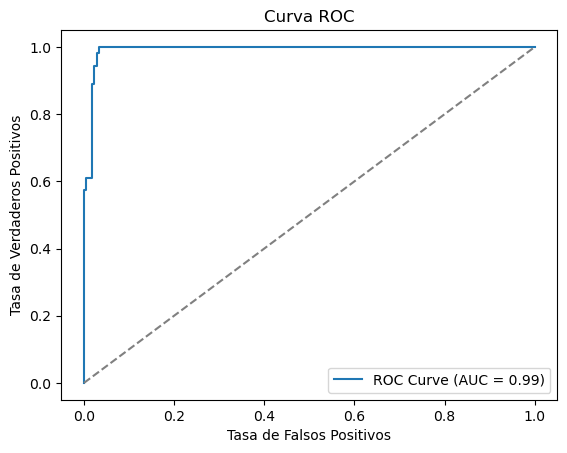

In [12]:
from sklearn.metrics import roc_curve, auc

# Predicciones con probabilidades
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualización de la Curva ROC
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.show()


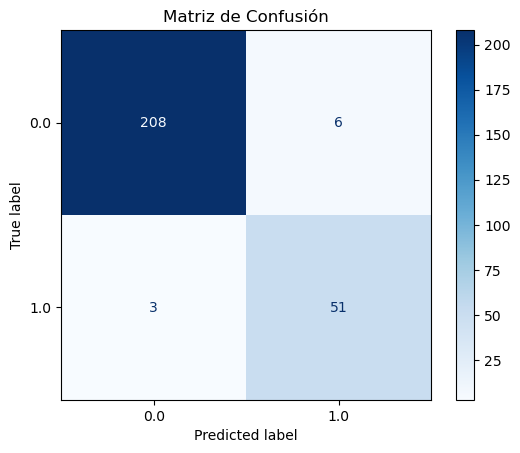

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicciones del modelo optimizado (ejemplo: modelo de Regresión Logística)
y_pred = grid_search.best_estimator_.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


**Interpretación de la Matriz de Confusión**

La matriz de confusión te muestra cómo el modelo clasificó los datos:

**TP (True Positives):** Casos positivos correctamente clasificados.

**TN (True Negatives):** Casos negativos correctamente clasificados.

**FP (False Positives):** Casos negativos clasificados como positivos (error tipo I).

**FN (False Negatives):** Casos positivos clasificados como negativos (error tipo II).


In [14]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       214
         1.0       0.89      0.94      0.92        54

    accuracy                           0.97       268
   macro avg       0.94      0.96      0.95       268
weighted avg       0.97      0.97      0.97       268



**Este reporte incluirá:**

* Exactitud: Proporción de predicciones correctas sobre el total.

* Precisión (Precision): Qué porcentaje de las predicciones positivas fue correcto.

* Recall (Sensibilidad): Qué porcentaje de los casos positivos reales fue identificado.

* F1-Score: Media armónica de precisión y recall.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Proyecto 2-Parte II (core)

**Proyecto 2: Análisis y Selección de Problema**

**Parte II: Preprocesamiento y Optimización**

**Objetivo:** Realizar el preprocesamiento de datos y la optimización de modelos de machine learning para el conjunto de datos seleccionado. La meta es elegir la técnica de machine learning más adecuada y optimizar sus hiperparámetros para obtener el mejor rendimiento posible.


**Instrucciones Detalladas**

**Parte 1: Preprocesamiento de Datos**

**1. Limpieza de Datos:**

* Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).

* Manejar los outliers mediante técnicas de filtrado o transformación.


**2. Transformación de Columnas:**

* Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.

* Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.

* Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.


**3. Creación de Pipelines:**

* Crear pipelines utilizando Pipeline de sklearn para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.

* Incluir todos los pasos de preprocesamiento en el pipeline.


**Parte 2: Selección de Técnica de Machine Learning**

**1.Entrenamiento Inicial:**

* Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM).

* Evaluar los modelos utilizando validación cruzada y seleccionar el modelo con el mejor rendimiento inicial.

**2.Comparación de Modelos:**

* Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.).

* Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.


**Parte 3: Optimización de Hiperparámetros**

**1. GridSearchCV:**

* Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.

* Definir el espacio de búsqueda para los hiperparámetros relevantes.

**2. RandomizedSearchCV:**

* Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.

**3. Optuna:**

* Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.

**4. Evaluación de Modelos Optimizados:**

* Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.

* Comparar el rendimiento del modelo optimizado con el modelo inicial.


In [16]:
# Verificar valores nulos
print("Valores nulos por columna:\n", df_medical.isnull().sum())

Valores nulos por columna:
 age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Definir las columnas categóricas y numéricas originales
categorical_cols = ['sex', 'smoker', 'region']  # Columnas categóricas originales
numeric_cols = ['age', 'bmi', 'charges']  # Columnas numéricas originales

# Configurar el transformador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Escalar numéricas
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)  # Codificar categóricas originales
    ],
    remainder='passthrough'  # Dejar columnas no especificadas como están
)


In [20]:
print("Columnas en el DataFrame:", df_medical.columns)


Columnas en el DataFrame: Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [27]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Escalar solo las columnas numéricas
numeric_cols = ['age', 'bmi', 'charges']
scaler = StandardScaler()

# Crear un pipeline con escalado y modelo
pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('model', RandomForestClassifier(random_state=42))
])

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el escalador solo a las columnas numéricas
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Entrenar el modelo usando los datos escalados
pipeline.fit(X_train_scaled, y_train)

# Evaluar el modelo
print("Score inicial:", pipeline.score(X_test_scaled, y_test))


Score inicial: 0.9589552238805971


In [26]:
# Verificar las columnas en X e y
print("Columnas en X:", X.columns)
print("Variable objetivo (y):", y.name)


Columnas en X: Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
Variable objetivo (y): smoker_yes


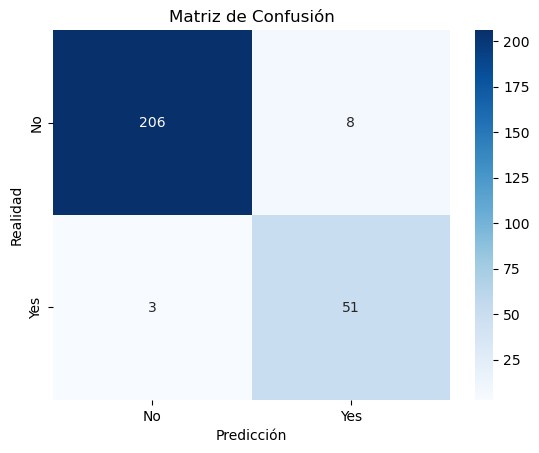

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       214
         1.0       0.86      0.94      0.90        54

    accuracy                           0.96       268
   macro avg       0.93      0.95      0.94       268
weighted avg       0.96      0.96      0.96       268



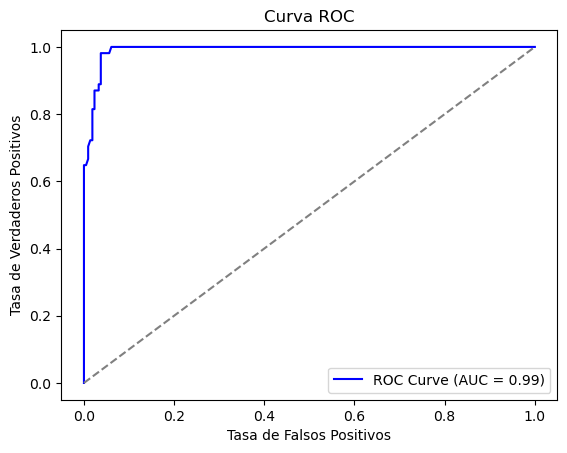

In [28]:
# Evaluacion de modelo
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones
y_pred = pipeline.predict(X_test_scaled)
y_pred_proba = pipeline.predict_proba(X_test_scaled)[:, 1]

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend(loc="lower right")
plt.show()


In [29]:
# Optimizacion de hiperametros
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10]
}

# Crear el pipeline con GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)


Mejores parámetros: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Mejor score: 0.9588785046728973


In [31]:
# RandonmizedSerachCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir la distribución de hiperparámetros
param_dist = {
    'model__n_estimators': np.arange(50, 300, 50),
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Crear el pipeline con RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros (RandomizedSearch):", random_search.best_params_)
print("Mejor score (RandomizedSearch):", random_search.best_score_)


Mejores parámetros (RandomizedSearch): {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 10}
Mejor score (RandomizedSearch): 0.9579439252336449


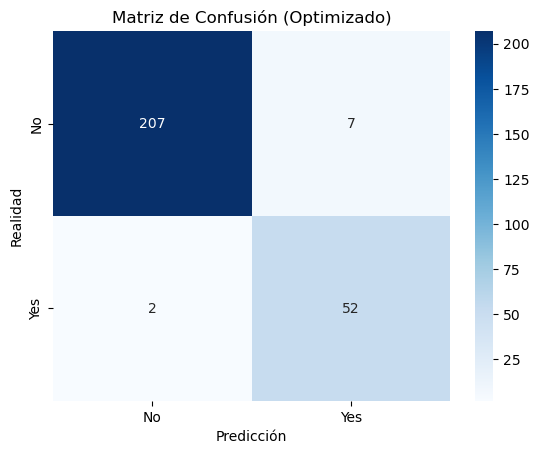

Reporte de Clasificación (Optimizado):
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       214
         1.0       0.88      0.96      0.92        54

    accuracy                           0.97       268
   macro avg       0.94      0.97      0.95       268
weighted avg       0.97      0.97      0.97       268



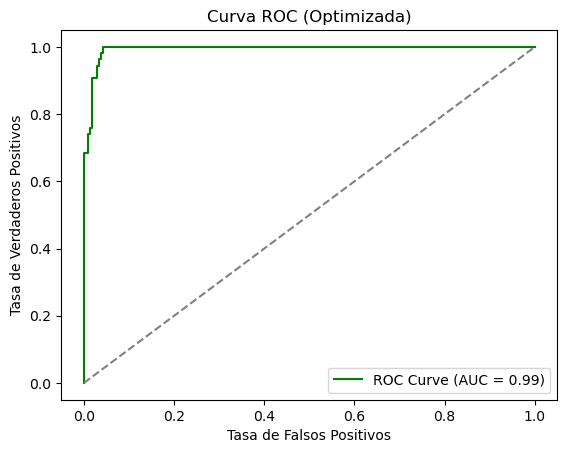

In [32]:
# Comparar el Modelo Optimizado con el Modelo Inicial
# Usar el mejor modelo encontrado con GridSearch o RandomizedSearch
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

# Matriz de confusión
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Matriz de Confusión (Optimizado)")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación (Optimizado):\n", classification_report(y_test, y_pred_best))

# Curva ROC (Optimizada)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best, pos_label=1)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, color='green', label=f'ROC Curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC (Optimizada)")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend(loc="lower right")
plt.show()


**Mejor modelo**

**Justificación**

* El Random Forest optimizado es mejor que otros posibles modelos porque:

    * Tiene una combinación de alta exactitud, recall, y F1-Score.

    * Es robusto para manejar datasets con datos categóricos y numéricos.
    
    * Su rendimiento ha mejorado claramente después de la optimización.